# Mansi Pawar - 1132220309 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 insurance=pd.read_csv("D:\ppt ds sem2\ML Lab\insurance.csv")

In [3]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# EDA

MISSING VALUES

In [4]:
insurance.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

<AxesSubplot:>

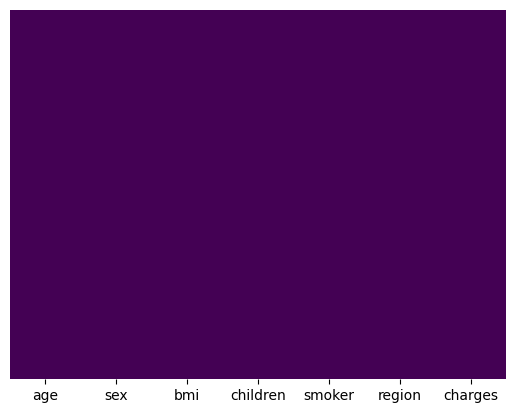

In [5]:
sns.heatmap(insurance.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Feature visualization and distribution

<AxesSubplot:xlabel='sex', ylabel='count'>

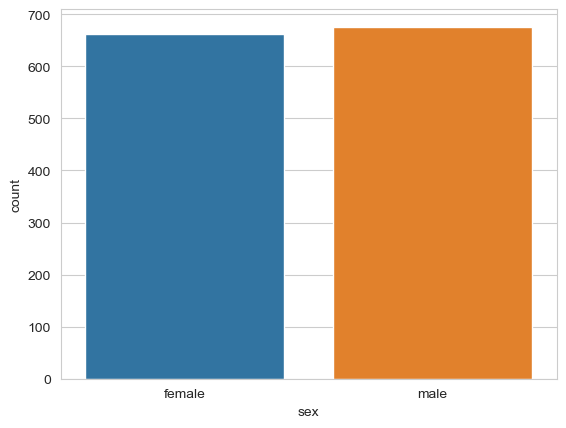

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=insurance)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

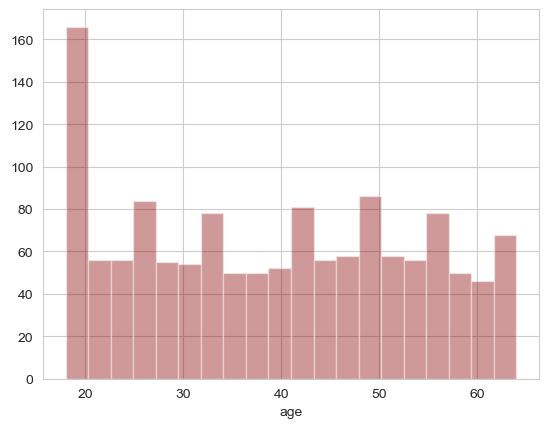

In [7]:
sns.distplot(insurance['age'].dropna(),kde=False,color='darkred',bins=20)

<AxesSubplot:xlabel='bmi'>

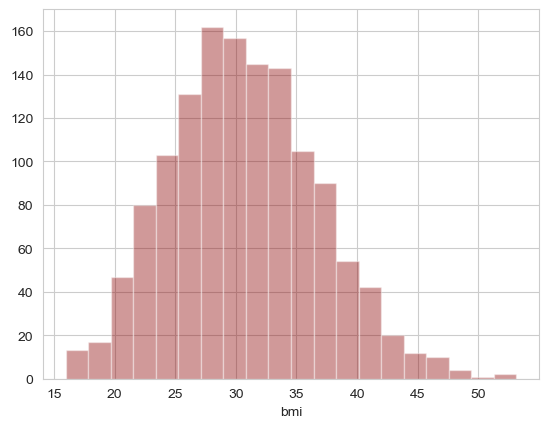

In [8]:
sns.distplot(insurance['bmi'].dropna(),kde=False,color='darkred',bins=20)

<AxesSubplot:xlabel='children', ylabel='count'>

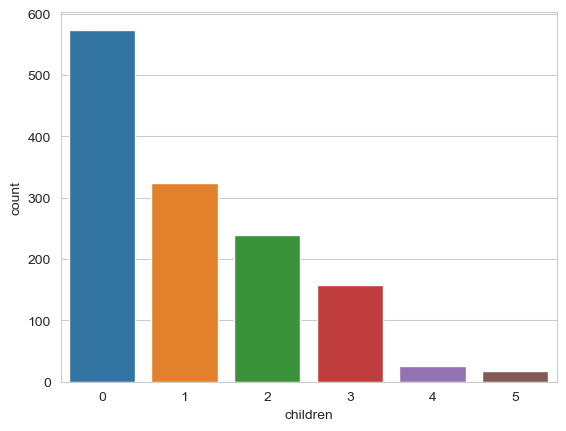

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='children',data=insurance)

<AxesSubplot:xlabel='smoker', ylabel='count'>

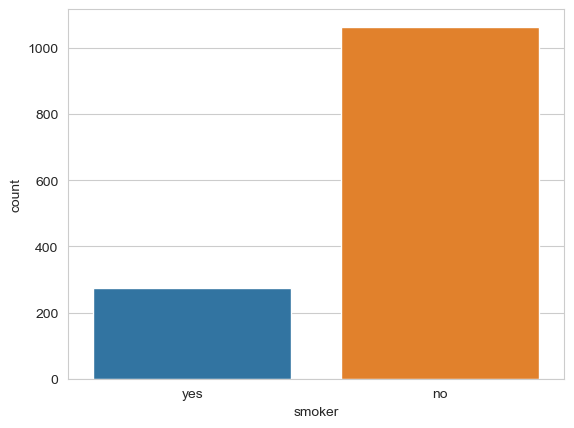

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='smoker',data=insurance)

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='region',data=insurance)

<AxesSubplot:xlabel='region', ylabel='count'>

In [12]:
sns.distplot(insurance['charges'].dropna(),kde=False,color='darkred',bins=20)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges'>

In [13]:
sns.scatterplot(data=insurance, x='bmi', y='charges', hue='sex')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

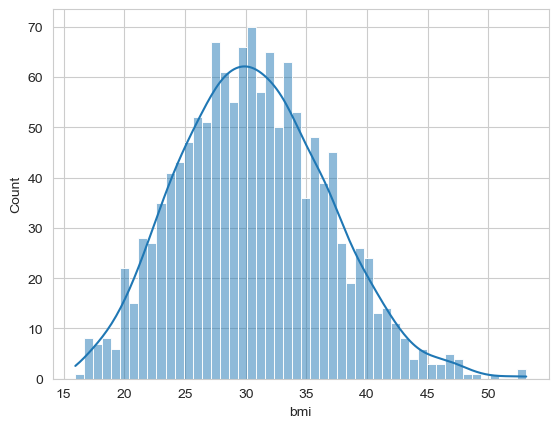

In [14]:
sns.histplot(data=insurance, x='bmi', bins=50, kde=True);

In [15]:
sns.boxplot(data=insurance, x='smoker', y='charges');

In [16]:
sns.boxplot(data=insurance, x='region', y='charges');

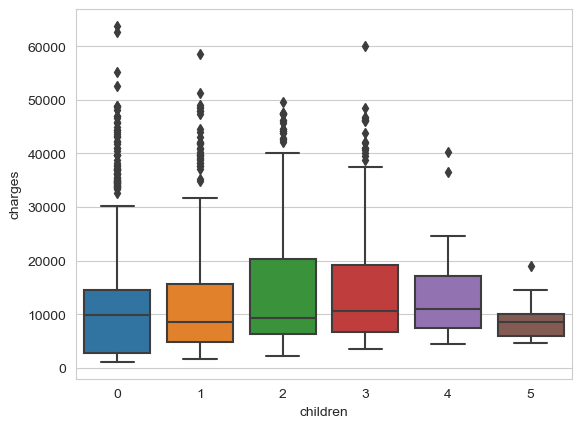

In [17]:
sns.boxplot(data=insurance, x='children', y='charges');

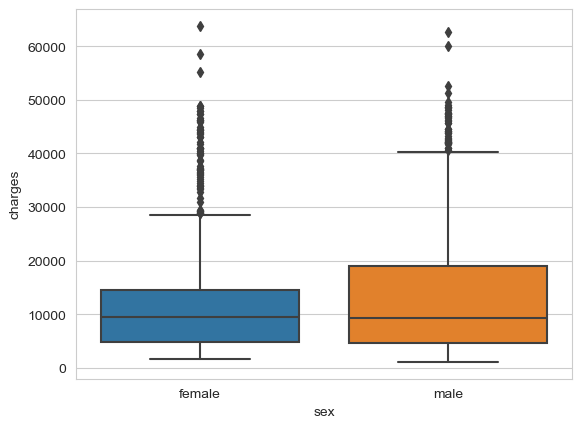

In [18]:
sns.boxplot(data=insurance, x='sex', y='charges');

In [31]:
 correlation =insurance.corr()

<AxesSubplot:>

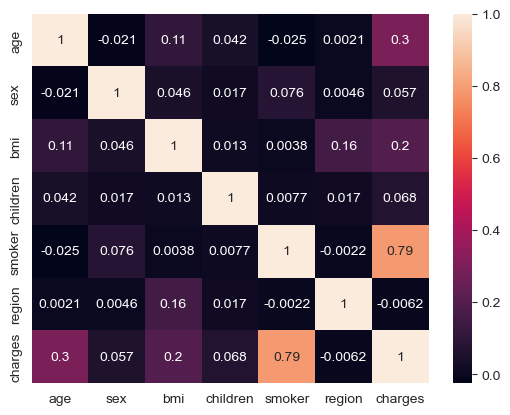

In [32]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot = True)

# Feature Engineering

In [19]:
for i in insurance.columns:
    print(len(insurance[i].unique()))

47
2
548
6
2
4
1337


In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
insurance.iloc[:,1] = label_encoder.fit_transform(insurance.iloc[:,1])
insurance.iloc[:,4] = label_encoder.fit_transform(insurance.iloc[:,4])
insurance.iloc[:,5] = label_encoder.fit_transform(insurance.iloc[:,5])


In [21]:
insurance.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [23]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
y1 = insurance[['charges']]
scaledy1 = scaling.fit_transform(y1)
print(scaledy1)

[[ 0.2985838 ]
 [-0.95368917]
 [-0.72867467]
 ...
 [-0.96159623]
 [-0.93036151]
 [ 1.31105347]]


# Feature Selection

In [24]:
X=insurance.iloc[:,:-1]
y=insurance['charges']

In [25]:
X

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
ordered_rank_features=SelectKBest(score_func=chi2,k=6)
ordered_feature=ordered_rank_features.fit(X,y)

ValueError: Unknown label type: (array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603]),)

In [29]:
heartscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
heartcolumns=pd.DataFrame(X.columns)

NameError: name 'ordered_feature' is not defined

# Model Applications

In [33]:
## train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
X_train

age  sex     bmi  children  smoker  region
332    61    0  31.160         0       0       1
355    46    1  27.600         0       0       3
138    54    0  31.900         3       0       2
381    55    1  30.685         0       1       0
292    25    1  45.540         2       1       2
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[936 rows x 6 columns]

In [35]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [39]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
MSE=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [41]:
np.mean(MSE)

-38307454.092822336

In [42]:
##prediction 
reg_pred=regression.predict(X_test)

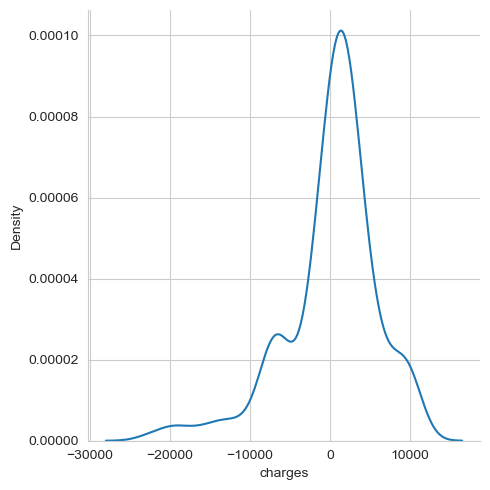

In [44]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [45]:
from sklearn.metrics import r2_score

In [46]:
score=r2_score(reg_pred,y_test)

In [47]:
score

0.694979479035194